### 결정트리

결정 트리는 분류와 회귀 문제에 널리 사용하는 모델입니다. 기본적으로 결정 트리는 결정에 다다르기 위해 예/아니오 질문을 이어나가면서 학습한다. 

이 질문은 스무고개 놀이의 질문과 비슷합니다. 곰, 매, 펭귄, 돌고래라는 네 가지 동물을 구분한다고 생각해봅시다. 우리의 목표는 가능한 적은 `예/아니오`의 질문으로 문제를 해결하는 것이다.  

In [10]:
!pip install graphviz

In [ ]:
!conda install graphviz

In [2]:
 # coding: utf-8

import matplotlib.pyplot as plt
import mglearn
import os

os.environ["PATH"]+=os.pathsep+'C:/Program Files/Graphviz/bin/'

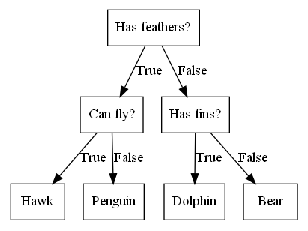

In [3]:
mglearn.plots.plot_animal_tree()

2차원 데이터셋을 분류하는 결정 트리를 만들어보겠습니다. 이 데이터셋은 각 클래스에 대해 데이터 포인트가 75개 있다. 반달 두개가 포개진 듯한 모양을 하고 있다. 이 데이터셋을 two_moons라고 하겠습니다. 

결정 트리를 학습한다는 것은 정답에 가장 빨리 도달하는 `예/아니오 질문 목록`을 학습한다는 의미.(어떤 질문들에 대한 답을 알고 있는가?) 머신러닝에서는 이런 질문들을 테스트라고 한다. (* 모델이 잘 일반화되었는지 테스트할 때 사용하는 데이터, 테스트 세트와는 혼동하지 말 것)

연속적인 데이터에 적용할 테스트 = `"특성 i는 값 a보다 큰가?"`



? 왜 데이터셋을 x[1] = 0.0596에서 수평으로 나누는 것이 가장 많은 정보를 포함한다는 의미가 무슨 의미인가?


x[1] = 0.0596에서 수평으로 나누는 것이 가장 많은 정보를 포함합니다. 즉, 이 직선이 클래스 0에 속한 포인트와 클래스 1에 속한 포인트를 가장 잘 나누고 있습니다. 

루트노드라 불리는 맨 위 노드는 클래스 0에 속한 포인트 75개와 클래스 1에 속한 포인트 75개

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)
print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 1.000
테스트 세트 정확도: 0.937


트리의 가지치기를 하지 않으면, 과대적합이 된다. 왜냐면 리프노드일 때 까지 계속 트리를 만들었기 때문이다! 트리의 길이를 다음과 같이 제한해볼 수가 있다.

In [7]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

print("훈련 세트 정확도: {:.3f}".format(tree.score(X_train, y_train)))
print("테스트 세트 정확도: {:.3f}".format(tree.score(X_test, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.951


결정 트리의 깊이를 제한하지 않으면 트리는 무한정 깊어지고 복잡해질 수가 있다. 그래서 가지치기하지 않은 트리는 과대적합되기 쉽고 새로운 데이터에 잘 일반화되지가 않는다. 이제 사전 가지치기를 트리에 적용해서 훈련 데이터에 완전 학습되기 전에 트리의 성장을 막아보겠습니다. max_depth=4 옵션을 주면 연속된 질문을 최대 4개로 제한한다. 트리 깊이를 제한하면, 과대적합이 줄어든다. 이는 훈련세트의 정확도를 떨어뜨리지만, 테스트 세트의 성능은 개선시킨다. (일반화가 잘된다는 의미)

In [8]:
from sklearn.tree import export_graphviz

export_graphviz(tree, out_file="tree.dot", class_names=["악성", "양성"],
               feature_names=cancer.feature_names,
               impurity=False, filled=True)

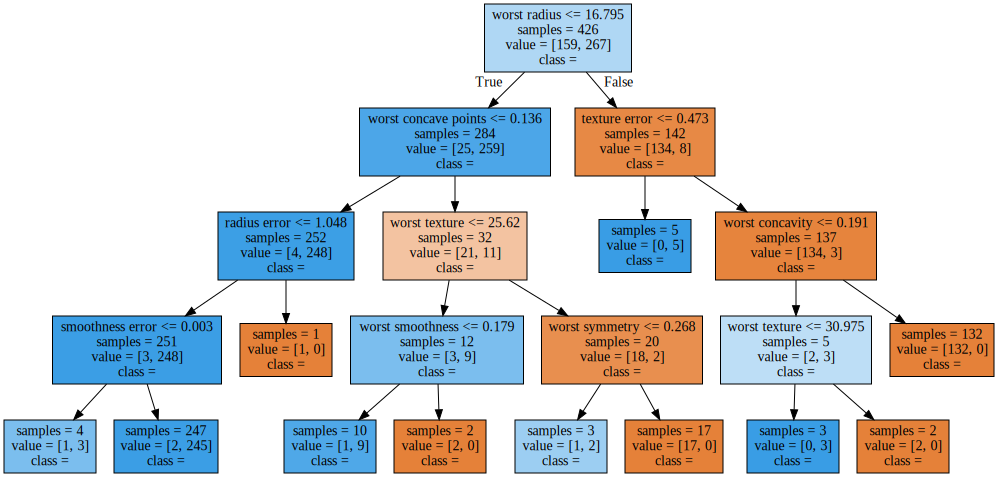

In [12]:
import graphviz

with open("tree.dot",encoding='UTF-8') as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

트리 시각화를 하면 알고리즘의 예측이 어떻게 이뤄지는 지 설명하기가 편하다. 비 전문가에게 머신러닝 알고리즘을 설명하기에 참 좋다. 여기서 보듯이 깊이가 4만 되어도 트리는 매우 장황해진다. 트리가 더 깊어지면 (10 정도의 깊이는 보통입니다.)

? 루트노드에서 426개의 샘플이 존재하는데, 왼쪽 자식노드 + 오른쪽 자식노드 = 426 맞다 <br><br>
? 근데 왜 샘플개수가 284, 142로 나뉘어지는지? 159와 267이 아닌 이유도 궁금하다. 

In [13]:
print("특성 중요도: \n{}".format(tree.feature_importances_))

특성 중요도: 
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


? 특성 중요도 자체가 왜 나왔는지 이해가 잘 안된다.

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 53945 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 49457 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 51473 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 50836 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 46020 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 53945 missing from c

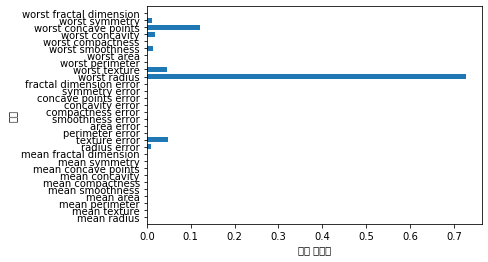

In [16]:
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel("특성 중요도")
    plt.ylabel("특성")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(tree)

Feature importances: [0. 1.]


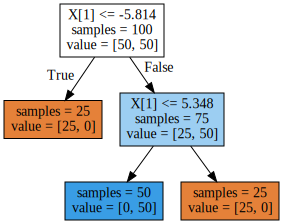

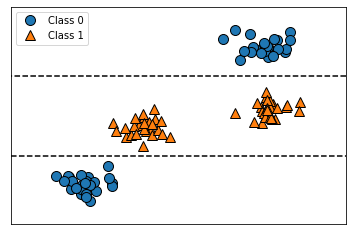

In [17]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

In [19]:
### 폰트설정

%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

path = 'C:\\Windows\\Fonts\\NanumGothicBold.ttf'
font_name = fm.FontProperties(fname=path, size=14).get_name()
print(font_name)
plt.rc('font', family=font_name)


NanumGothic


Text(0, 0.5, '가격 ($/Mbyte_')

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


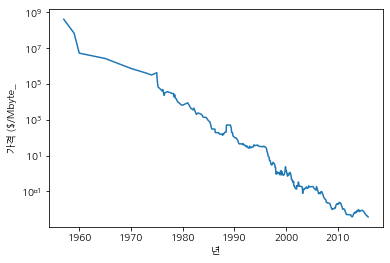

In [20]:
import pandas as pd

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"))

plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel("년")
plt.ylabel("가격 ($/Mbyte_")

In [22]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression


data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

X_train = data_train.date[:, np.newaxis]
y_train = np.log(data_train.price)

tree = DecisionTreeRegressor().fit(X_train, y_train)
linear_reg = LinearRegression().fit(X_train, y_train)

X_all = ram_prices.date[:, np.newaxis]

pred_tree = tree.predict(X_all)
pred_lr = linear_reg.predict(X_all)

price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.
Font 'default' does not have a glyph for '-' [U+2212], substituting with a dummy symbol.


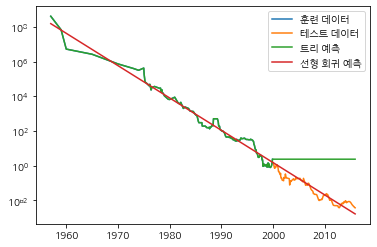

In [23]:
plt.semilogy(data_train.date, data_train.price, label="훈련 데이터")
plt.semilogy(data_test.date, data_test.price, label="테스트 데이터")
plt.semilogy(ram_prices.date, price_tree, label="트리 예측")
plt.semilogy(ram_prices.date, price_lr, label="선형 회귀 예측")
plt.legend()